# import 

In [1]:
import pandas as pd
import os

from difflib import SequenceMatcher
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline


# Data Overview

In [2]:
# creat link of data
link = "C:/Users/FPTSHOP/Downloads/project_houses_price/"
# get data in link
files = [file for file in os.listdir(link)]
# create Dataframe
df = pd.DataFrame()
# create type of data
types = ['aparment', 'road surface', 'land']
for i in range(len(files)):
    temp_df = pd.read_excel(link + files[i])
    temp_df['type'] = types[i]
    df = pd.concat([df, temp_df])

In [3]:
#delete columns of data unimportant
df.drop(['id_thanh_pho', 'id_quan', 'id_duong', 'id_phuong', 'du_an', 'lat', 'long'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127360 entries, 0 to 27253
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Column1           127360 non-null  int64  
 1   dien_tich         125695 non-null  float64
 2   huong_ban_cong    13411 non-null   object 
 3   phong_ngu         64729 non-null   float64
 4   ten_thanh_pho     127360 non-null  object 
 5   ten_quan          127359 non-null  object 
 6   so_tang           50410 non-null   float64
 7   mat_tien          30795 non-null   float64
 8   noi_that          19551 non-null   object 
 9   huong_nha         30736 non-null   object 
 10  so_do             70434 non-null   object 
 11  gia               116061 non-null  float64
 12  gia_m2            115819 non-null  float64
 13  project_name      8807 non-null    object 
 14  ten_duong         113944 non-null  object 
 15  do_rong_duong     19052 non-null   float64
 16  do_rong_duong_ml  644

In [5]:
df.head()

,Column1,dien_tich,huong_ban_cong,phong_ngu,ten_thanh_pho,ten_quan,so_tang,mat_tien,noi_that,huong_nha,so_do,gia,gia_m2,project_name,ten_duong,do_rong_duong,do_rong_duong_ml,ten_phuong,type
0,0,75.0,NaN,2.0,Thành phố Hà Nội,Quận Ba Đình,NaN,NaN,NaN,NaN,Sổ đỏ chính chủ,6300.0,84.000000,NaN,Phố Ngọc Khánh,NaN,NaN,Phường Ngọc Khánh,aparment
1,1,115.0,Đông Nam,3.0,Thành phố Hà Nội,Quận Ba Đình,NaN,NaN,NaN,Tây Bắc,Đã có sổ,10250.0,89.130435,NaN,Phố Ngọc Khánh,NaN,NaN,Phường Ngọc Khánh,aparment
2,2,100.0,NaN,2.0,Thành phố Hà Nội,Quận Ba Đình,1.0,NaN,NaN,Nam,Sổ hồng/ Sổ đỏ,2600.0,26.000000,NaN,Phố Thành Công Bắc,NaN,NaN,Phường Thành Công,aparment
3,3,30.0,NaN,2.0,Thành phố Hà Nội,Quận Ba Đình,2.0,NaN,NaN,NaN,Sổ đỏ,3500.0,116.666667,NaN,NaN,NaN,NaN,NaN,aparment
4,4,72.0,NaN,2.0,Thành phố Hà Nội,Quận Ba Đình,3.0,NaN,NaN,Đông,Sổ hồng/ Sổ đỏ,1750.0,24.305556,NaN,Phố Đặng Dung,NaN,NaN,Phường Quán Thánh,aparment


In [6]:
df.isna().sum()

Column1                  0
dien_tich             1665
huong_ban_cong      113949
phong_ngu            62631
ten_thanh_pho            0
ten_quan                 1
so_tang              76950
mat_tien             96565
noi_that            107809
huong_nha            96624
so_do                56926
gia                  11299
gia_m2               11541
project_name        118553
ten_duong            13416
do_rong_duong       108308
do_rong_duong_ml     62862
ten_phuong           14013
type                     0
dtype: int64

In [7]:
df.describe()

,Column1,dien_tich,phong_ngu,so_tang,mat_tien,gia,gia_m2,do_rong_duong
count,127360.000000,1.256950e+05,64729.000000,50410.000000,30795.000000,1.160610e+05,1.158190e+05,19052.000000
mean,23871.826500,4.107974e+04,4.906672,5.861912,9.261050,2.480137e+08,4.732355e+06,14.835828
std,16375.351959,5.935946e+06,53.847414,60.856736,25.254711,4.635162e+10,8.299879e+08,15.478882
min,0.000000,0.000000e+00,-3.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,10613.000000,5.000000e+01,2.000000,4.000000,4.200000,2.560000e+03,3.281250e+01,5.000000
50%,21226.000000,7.300000e+01,3.000000,5.000000,5.000000,5.850000e+03,9.000000e+01,10.000000
75%,34132.250000,1.090000e+02,5.000000,6.000000,8.000000,1.680000e+04,2.200000e+02,20.000000
max,62846.000000,9.071686e+08,9500.000000,9500.000000,999.000000,1.400000e+13,2.296000e+11,666.000000


In [8]:
df.columns

Index(['Column1', 'dien_tich', 'huong_ban_cong', 'phong_ngu', 'ten_thanh_pho',
       'ten_quan', 'so_tang', 'mat_tien', 'noi_that', 'huong_nha', 'so_do',
       'gia', 'gia_m2', 'project_name', 'ten_duong', 'do_rong_duong',
       'do_rong_duong_ml', 'ten_phuong', 'type'],
      dtype='object')

## Drop duplicates row , missing values & rename columns

In [9]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(127360, 19)

## Columns cleaning

In [11]:
# Function to clean unique and dtype of a given column.
def print_unique_dtype(column):
  """Print unique and dtype of a given column"""
  
  unique = df[column].value_counts().nunique()
  dtype = df[column].dtype

  print(f"{unique} - {dtype}")

### 'dien_tich'

In [12]:
print_unique_dtype('dien_tich')
df['dien_tich'].value_counts()

219 - float64


50.0       6235
60.0       4302
70.0       3669
40.0       3370
100.0      3368
           ... 
1772.0        1
2002.0        1
94.9          1
11850.0       1
2680.0        1
Name: dien_tich, Length: 3055, dtype: int64

In [13]:
# delete data with empty area
df = df.drop(df.loc[df['dien_tich'].isna()== True, :].index)

In [14]:
df = df.loc[df['dien_tich'] < 300, :]

### 'huong_ban_cong'

In [15]:
print_unique_dtype('huong_ban_cong')
df['huong_ban_cong'].value_counts()

12 - object


Đông-Nam    3142
Đông Nam    1609
Đông-Bắc    1336
Nam         1201
Tây-Bắc     1179
Tây-Nam     1085
Đông Bắc     733
Bắc          677
Đông         533
Tây Nam      496
Tây Bắc      486
Tây          364
Name: huong_ban_cong, dtype: int64

In [16]:
df = df.replace({'huong_ban_cong': {np.nan: 'không xác định'}})

### 'ten_thanh_pho' 

In [17]:
print_unique_dtype('ten_thanh_pho')
df['ten_thanh_pho'].value_counts()

2 - object


Thành phố Hà Nội    116147
Hà Nội                 333
Name: ten_thanh_pho, dtype: int64

In [18]:
df = df.replace({'ten_thanh_pho': {'Hà Nội': 'Thành phố Hà Nội'}})

### 'ten_quan'

In [19]:
print_unique_dtype('ten_quan')
df['ten_quan'].value_counts()

42 - object


Quận Cầu Giấy        12081
Quận Đống Đa         10955
Quận Hà Đông         10829
Quận Long Biên        9933
Quận Nam Từ Liêm      9881
Quận Thanh Xuân       8476
Quận Hai Bà Trưng     8374
Quận Tây Hồ           7449
Quận Hoàng Mai        7354
Quận Ba Đình          6824
Quận Bắc Từ Liêm      5669
Huyện Gia Lâm         3948
Quận Hoàn Kiếm        2367
Huyện Thanh Trì       2310
Huyện Hoài Đức        2274
Huyện Đông Anh        1780
Huyện Thạch Thất      1334
Huyện Quốc Oai         744
Huyện Đan Phượng       707
Huyện Sóc Sơn          682
Huyện Chương Mỹ        535
Huyện Thanh Oai        361
Thị xã Sơn Tây         356
Huyện Thường Tín       337
Huyện Mê Linh          217
Huyện Ba Vì            150
Huyện Phúc Thọ         111
Huyện Phú Xuyên         83
Đống Đa                 68
Thanh Xuân              40
Ba Đình                 37
Hà Đông                 31
Cầu Giấy                28
Tây Hồ                  28
Long Biên               28
Huyện Mỹ Đức            17
Hoàng Mai               13
H

In [20]:
df = df.drop(df.loc[df['ten_quan'].isna()== True, :].index)

In [21]:
# replace data 
df = df.replace({'ten_quan': {'Ba Đình': 'Quận Ba Đình', 'Hà Đông': 'Quận Hà Đông', 'Ba Vì': 'Huyện Ba Vì', 'Đan Phượng': "Huyện Đan Phượng", 'Hoài Đức': "Huyện Hoài Đức",'Tây Hồ': 'Quận Tây Hồ', 'Long Biên': 'Quận Long Biên', 'Cầu Giấy': 'Quận Cầu Giấy', 'Đống Đa': 'Quận Đống Đa', 'Hai Bà Trưng': 'Quận Hai Bà Trưng', 'Hoàng Mai': 'Quận Hoàng Mai', 'Thanh Xuân': 'Quận Thanh Xuân', 'Đông Anh':'Huyện Đông Anh', 'Gia Lâm':'Huyện Gia Lâm',
                              'Thanh Trì':'Huyện Thanh Trì', 'Bắc Từ Liêm': 'Quận Bắc Từ Liêm','Thường Tín':'Huyện Thường Tín', 'Hoàn Kiếm':'Quận Hoàn Kiếm', 'Nam Từ Liêm':'Quận Nam Từ Liêm',
                             'Sơn Tây': 'Thị xã Sơn Tây', 'Quốc Oai': 'Huyện Quốc Oai', 'Thạch Thất': 'Huyện Thạch Thất', 'Sóc Sơn': 'Huyện Sóc Sơn', 'Phú Xuyên': 'Huyện Phú Xuyên'}})

### 'so_tang'

In [22]:
print_unique_dtype('so_tang')
df['so_tang'].value_counts()

40 - float64


5.0      14057
4.0       9303
6.0       4973
3.0       3956
7.0       3777
         ...  
965.0        1
354.0        1
71.0         1
51.0         1
158.0        1
Name: so_tang, Length: 61, dtype: int64

In [23]:
df = df.replace({'so_tang': {np.nan : 0}})

In [24]:
print('total quanlity > 100 is: ', df.loc[df['so_tang'] > 100, :]['so_tang'].value_counts().sum())

total quanlity > 100 is:  12


In [25]:
# convert data type 'Phong_ngu' and 'so_tang'
df['so_tang'] = df['so_tang'].astype('int64')

### 'mat_tien'

In [26]:
print_unique_dtype('mat_tien')
df['mat_tien'].value_counts()

92 - float64


5.00     4371
4.00     3704
6.00     1973
4.50     1540
8.00     1154
         ... 
11.77       1
11.10       1
5.34        1
17.50       1
5.24        1
Name: mat_tien, Length: 634, dtype: int64

In [27]:
df = df.replace({'mat_tien': {np.nan: 0.0}})

In [28]:
df = df.loc[df['mat_tien'] < 30, :]

### 'noi_that'

In [29]:
print_unique_dtype('noi_that')
df['noi_that'].value_counts()

72 - object


Nội thất đầy đủ                                                                                                                                                                                             1163
Hoàn thiện cơ bản                                                                                                                                                                                            546
Nội thất cao cấp                                                                                                                                                                                             510
Full nội thất.                                                                                                                                                                                               453
Đầy đủ                                                                                                                                                              

In [30]:
df = df.replace({'noi_that': {np.nan : 'không rõ'}})

In [31]:
df['noi_that'] = df['noi_that'].str.lower()

### 'huong_nha'

In [32]:
print_unique_dtype('huong_nha')
df['huong_nha'].value_counts()

13 - object


KXĐ         6427
Đông-Nam    3028
Tây-Bắc     2755
Tây-Nam     1997
Đông Nam    1981
Nam         1952
Đông-Bắc    1929
Tây Bắc     1601
Bắc         1601
Đông        1324
Đông Bắc    1253
Tây         1243
Tây Nam     1163
Đông nam       4
Name: huong_nha, dtype: int64

In [33]:
df = df.replace({'huong_nha': {np.nan: 'không xác định'}})

### 'so_do'

In [34]:
print_unique_dtype('so_do')
df['so_do'].value_counts()

72 - object


Sổ hồng/ Sổ đỏ                              29352
Sổ đỏ                                        7554
Đã có sổ                                     4490
Sổ đỏ chính chủ                              2743
Sổ đỏ.                                       2405
                                            ...  
Đã có sổ đỏ, sẵn sàng giao dich ngay.           1
Sổ đỏ chính chủ đẹp, sẵn sàng giao dịch.        1
Đã có sổ, cất két chờ giao dịch                 1
Sổ đỏ sẵn giao dịch                             1
Đã nộp tiền đầy đủ                              1
Name: so_do, Length: 3046, dtype: int64

In [35]:
df = df.replace({'so_do': {np.nan: 'không có sổ'}})

### 'gia_m2'

In [36]:
print_unique_dtype('gia_m2')
df['gia_m2'].value_counts()

174 - float64


100.000000    881
25.000000     619
250.000000    564
200.000000    564
300.000000    536
             ... 
421.348315      1
451.111111      1
450.735294      1
443.243243      1
9.305556        1
Name: gia_m2, Length: 22972, dtype: int64

In [37]:
df = df.drop(df.loc[df['gia_m2'].isna() == True, :].index)

### 'gia'

In [38]:
print_unique_dtype('gia')
df['gia'].value_counts()

268 - float64


3000.00     921
5000.00     884
2500.00     853
600.00      750
15000.00    743
           ... 
44600.00      1
8720.00       1
13480.00      1
5233.10       1
554.48        1
Name: gia, Length: 6143, dtype: int64

In [39]:
# calculate product data 'gia' = 'dien_tich' * 'gia_m2'
df['gia'] = df['dien_tich'] * df['gia_m2']

In [40]:
df['gia'] = df['gia'].round(3)

### 'project_name'

In [41]:
print_unique_dtype('project_name')
df['project_name'].value_counts()

70 - object


Khu đô thị mới Cầu Giấy      364
Goldmark City                337
Golden Palace                248
Tây Mỗ                       172
Vinhomes Green Bay Mễ Trì    172
                            ... 
Richland Southern              1
Đông Đô                        1
N05 Trần Duy Hưng              1
N105 Nguyễn Phong Sắc          1
Bắc Phú Cát                    1
Name: project_name, Length: 314, dtype: int64

In [42]:
df = df.replace({'project_name': {np.nan : 'không có'}})

### 'ten_duong'

In [43]:
print_unique_dtype('ten_duong')
df['ten_duong'].value_counts()

268 - object


Đường Hoàng Mai            2484
Đường Long Biên            2199
Đường Minh Khai            1390
Đường Cầu Giấy             1140
Đường Đại lộ Thăng Long    1093
                           ... 
đường Đình Xuyên              1
đường Cầu Đuống               1
Đường Vạn Xuân                1
Đường Trần Tế Xương           1
Đường Số 1A                   1
Name: ten_duong, Length: 1425, dtype: int64

In [44]:
df = df.replace({'ten_duong': {np.nan: 'không rõ'}})

### 'do_rong_duong'

In [45]:
print_unique_dtype('do_rong_duong')
df['do_rong_duong'].value_counts()

49 - float64


20.0     1453
6.0      1341
10.0     1333
4.0      1169
5.0      1138
         ... 
19.5        1
58.0        1
666.0       1
7.5         1
312.0       1
Name: do_rong_duong, Length: 92, dtype: int64

In [46]:
df = df.replace({'do_rong_duong': {np.nan: 0.0}})

In [47]:
df = df.loc[df['do_rong_duong'] < 100, :]

### 'do_rong_duong_ml'

In [48]:
print_unique_dtype('do_rong_duong_ml')
df['do_rong_duong_ml'].value_counts()

7 - object


Mặt phố - Mặt đường    45388
Ngõ 1 ô tô              1766
Ngõ 4 ô tô trở lên      1545
Ngõ 2 ô tô tránh         879
Ngõ 3 ô tô tránh         485
Ngõ 4 ô tô tránh         355
Ngõ ngách                279
Name: do_rong_duong_ml, dtype: int64

In [49]:
df = df.replace({'do_rong_duong_ml': {np.nan : 'không rõ ml'}})

### 'ten_phuong'

In [50]:
print_unique_dtype('ten_phuong')
df['ten_phuong'].value_counts()

214 - object


Phường Long Biên    3529
Phường Trung Hòa    1885
Phường Mễ Trì       1636
Phường Dịch Vọng    1511
Phường Ô Chợ Dừa    1506
                    ... 
Xã Hiền Giang          1
Trung Văn              1
Tứ Hiệp                1
Xuân Tảo               1
Xã Hoàng Long          1
Name: ten_phuong, Length: 475, dtype: int64

In [51]:
df = df.replace({'ten_phuong': {np.nan: 'không rõ'}})

### 'type'

In [52]:
print_unique_dtype('type')
df['type'].value_counts()

3 - object


road surface    50140
aparment        27820
land            16412
Name: type, dtype: int64

# standardized data

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
aparment = df.loc[df['type'] == 'aparment', : ]
road_sunface = df.loc[df['type'] == 'road surface', : ]
land = df.loc[df['type'] == 'land', :]

### 'phong_ngu'

In [55]:
print(aparment['phong_ngu'].isna().sum())
print(land['phong_ngu'].isna().sum())
print(road_sunface['phong_ngu'].isna().sum())

6823
15657
19761


In [56]:
print(aparment['phong_ngu'].mode())
print(land['phong_ngu'].mode())
print(road_sunface['phong_ngu'].mode())

0    2.0
dtype: float64
0    1.0
dtype: float64
0    4.0
dtype: float64


In [57]:
aparment = aparment.replace({'phong_ngu': {np.nan: 2.0}})
land = land.replace({'phong_ngu': {np.nan: 1.0}})
road_sunface = road_sunface.replace({'phong_ngu': {np.nan: 4.0}})

In [58]:
aparment['phong_ngu'] = aparment['phong_ngu'].astype('int64')
land['phong_ngu'] = land['phong_ngu'].astype('int64')
road_sunface['phong_ngu'] = road_sunface['phong_ngu'].astype('int64')

# plot chart check data outline

In [59]:
print(aparment.shape)
print(road_sunface.shape)
print(land.shape)

(27820, 19)
(50140, 19)
(16412, 19)


C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


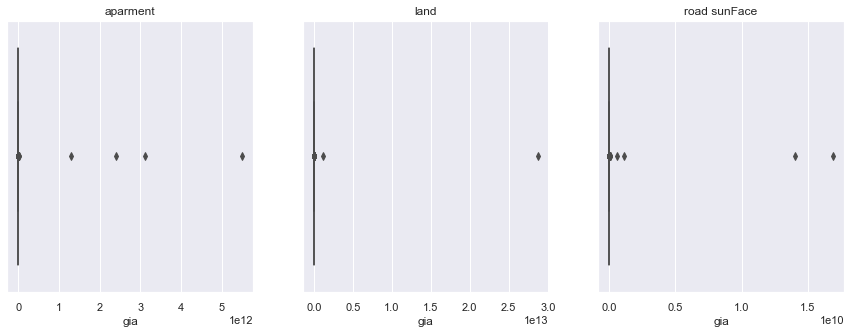

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("aparment")
sns.boxplot(aparment['gia'])

plt.subplot(1, 3, 2)
plt.title("land")
sns.boxplot(land['gia'])

plt.subplot(1, 3, 3)
plt.title("road sunFace")
sns.boxplot(road_sunface['gia'])
plt.show()

In [61]:
# tính giá trị Q1 và Q3
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

In [62]:
# lọc dữ liệu ngoại lai land
Q1Land = land.quantile(0.25)
Q3Land = land.quantile(0.75)
dfland = land[~((land < (Q1Land - 1.5 * IQR(land))) | (land > (Q3Land + 1.5 * IQR(land)))).any(axis=1)]
# lọc dữ liệu ngoại lai land
Q1road_sunface = road_sunface.quantile(0.25)
Q3road_sunface = road_sunface.quantile(0.75)
dfroad = road_sunface[~((road_sunface < (Q1road_sunface - 1.5 * IQR(road_sunface))) | (road_sunface > (Q3road_sunface + 1.5 * IQR(road_sunface)))).any(axis=1)]
# lọc dữ liệu ngoại lai land
Q1aparment = aparment.quantile(0.25)
Q3aparment = aparment.quantile(0.75)
dfaparment = aparment[~((aparment < (Q1aparment - 1.5 * IQR(aparment))) | (aparment > (Q3aparment + 1.5 * IQR(aparment)))).any(axis=1)]

C:\Users\FPTSHOP\AppData\Local\Temp/ipykernel_17488/2060750798.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfland = land[~((land < (Q1Land - 1.5 * IQR(land))) | (land > (Q3Land + 1.5 * IQR(land)))).any(axis=1)]
C:\Users\FPTSHOP\AppData\Local\Temp/ipykernel_17488/2060750798.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfroad = road_sunface[~((road_sunface < (Q1road_sunface - 1.5 * IQR(road_sunface))) | (road_sunface > (Q3road_sunface + 1.5 * IQR(road_sunface)))).any(axis=1)]
C:\Users\FPTSHOP\AppData\Local\Temp/ipykernel_17488/2060750798.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


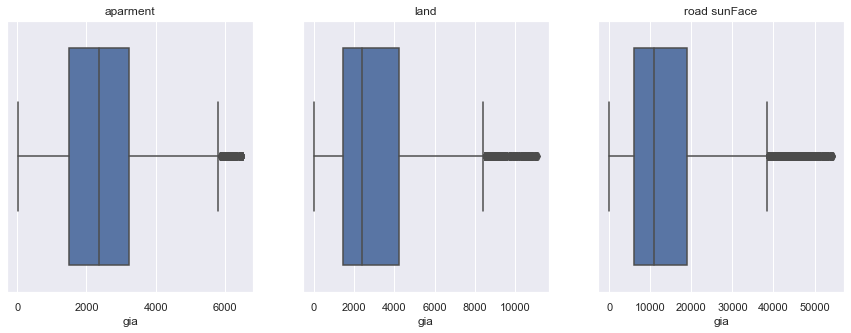

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("aparment")
sns.boxplot(dfaparment['gia'])

plt.subplot(1, 3, 2)
plt.title("land")
sns.boxplot(dfland['gia'])

plt.subplot(1, 3, 3)
plt.title("road sunFace")
sns.boxplot(dfroad['gia'])
plt.show()

In [64]:
print(dfaparment.shape)
print(dfland.shape)
print(dfroad.shape)

(23262, 19)
(11480, 19)
(27183, 19)


In [65]:
dfaparment = dfaparment.loc[dfaparment['gia'] < 6000, :]
dfland = dfland.loc[dfland['gia'] < 8500, :]
dfroad = dfroad.loc[dfroad['gia'] < 38000, :]

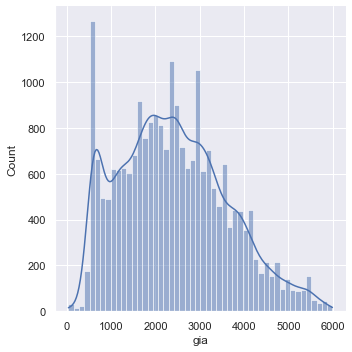

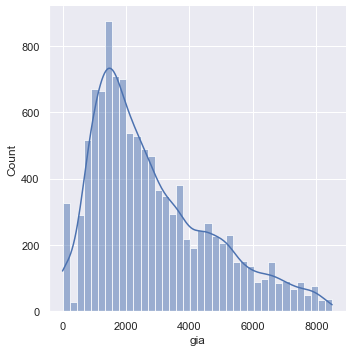

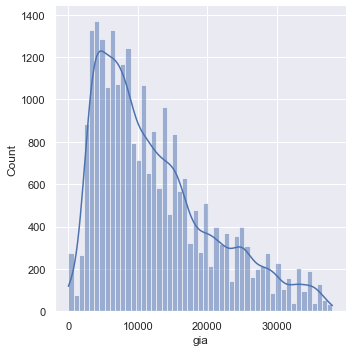

In [66]:

sns.displot(data=dfaparment, x="gia", kde=True)

sns.displot(data=dfland, x="gia", kde=True)

sns.displot(data=dfroad, x="gia", kde=True)


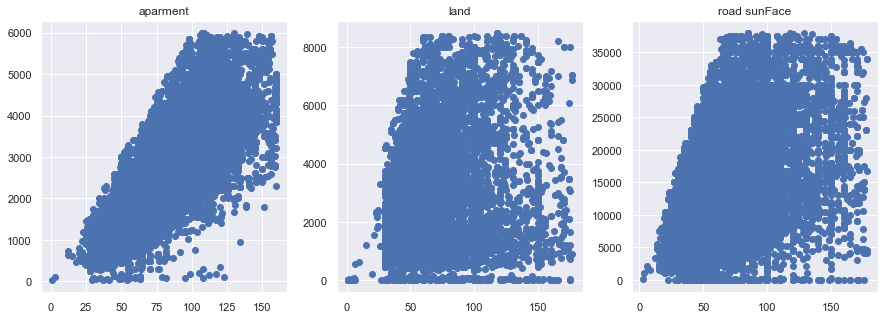

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("aparment")
plt.scatter(dfaparment['dien_tich'],dfaparment['gia'])

plt.subplot(1, 3, 2)
plt.title("land")
plt.scatter(dfland['dien_tich'],dfland['gia'])

plt.subplot(1, 3, 3)
plt.title("road sunFace")
plt.scatter(dfroad['dien_tich'],dfroad['gia'])
plt.show()

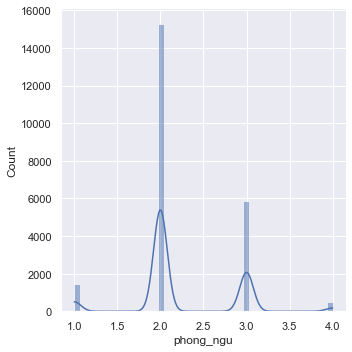

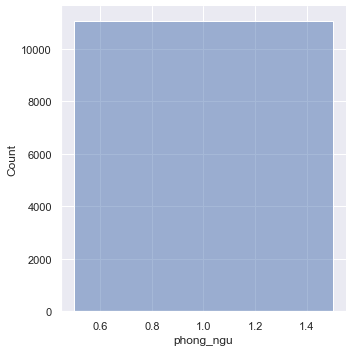

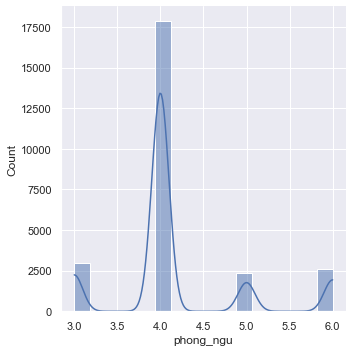

In [68]:

sns.displot(data=dfaparment, x="phong_ngu", kde=True)

sns.displot(data=dfland, x="phong_ngu", kde=True)

sns.displot(data=dfroad, x="phong_ngu", kde=True)

In [69]:
print(dfaparment['phong_ngu'].unique())
print(dfland['phong_ngu'].unique())
print(dfroad['phong_ngu'].unique())

[2 3 1 4]
[1]
[4 3 6 5]


## concat data

In [70]:
dfcenter = pd.concat([dfaparment, dfland, dfroad])

In [71]:
dfcenter.shape

(59918, 19)

In [72]:
dfcenter['gia'].max()

37999.0

### 'customer_classification'

In [73]:
dfcenter['customer_classification']  = pd.cut(x=dfcenter['gia'], bins = [0, 4000, 10000, 38000 ],
                    labels=['tầm thấp', 'tầm trung', 'tầm cao'])

In [74]:

dfcenter['customer_classification'].value_counts()

tầm thấp     32675
tầm trung    14169
tầm cao      13072
Name: customer_classification, dtype: int64

In [75]:
# delete 'customer_classification' is empty
dfcenter = dfcenter.drop(dfcenter.loc[dfcenter['customer_classification'].isna()== True, :].index)

In [76]:
dfcenter['customer_classification'] = dfcenter['customer_classification'].astype('object')

### 'tinh_trang_noi_that'

In [77]:
cat_cols = list(dfcenter['noi_that'].unique())
dfcenter['tinh_trang_noi_that'] = dfcenter['noi_that'].astype("category").cat.codes

In [78]:
# basic
idxNoi_that_co_ban = dfcenter['noi_that'].str.contains(r'cơ bản| thô ', flags=re.IGNORECASE, regex=True, na=False)
tinh_trang_co_ban = dfcenter.loc[idxNoi_that_co_ban == True, ['noi_that', 'tinh_trang_noi_that']] 
tinh_trang_co_ban = list(tinh_trang_co_ban['tinh_trang_noi_that'].unique())
dfcenter['tinh_trang_noi_that'] = dfcenter['tinh_trang_noi_that'].replace(to_replace = tinh_trang_co_ban, value = 'cơ bản')
# unknow
dfcenter['tinh_trang_noi_that'] = dfcenter['tinh_trang_noi_that'].replace(to_replace = 2596, value = 'không rõ')
# Luxury interior
idxNoi_that_da_co_san = dfcenter.loc[(dfcenter['tinh_trang_noi_that'] != 'không rõ') & (dfcenter['tinh_trang_noi_that'] != 'cơ bản'), ['noi_that', 'tinh_trang_noi_that']]
idxNoi_that_da_co_san = list(idxNoi_that_da_co_san['tinh_trang_noi_that'].unique())
dfcenter['tinh_trang_noi_that'] = dfcenter['tinh_trang_noi_that'].replace(to_replace = idxNoi_that_da_co_san, value = 'nội thất cao cấp')

In [79]:
dfcenter['tinh_trang_noi_that'] = dfcenter['tinh_trang_noi_that'].astype('object')

# save dataset

In [82]:
dfcenter.shape

(59914, 21)

In [83]:
dfcenter.to_csv("dataset.csv")